In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_injuries = pd.read_csv('C:/Users/anton/OneDrive/Documentos/Bootcamp_Ciberseguridad/coding-projects/PythonMeta/RecoveryTimePredictor/injury_data.csv')
df_injuries.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [4]:
df_injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [5]:
df_injuries.columns.to_list()

['Player_Age',
 'Player_Weight',
 'Player_Height',
 'Previous_Injuries',
 'Training_Intensity',
 'Recovery_Time',
 'Likelihood_of_Injury']

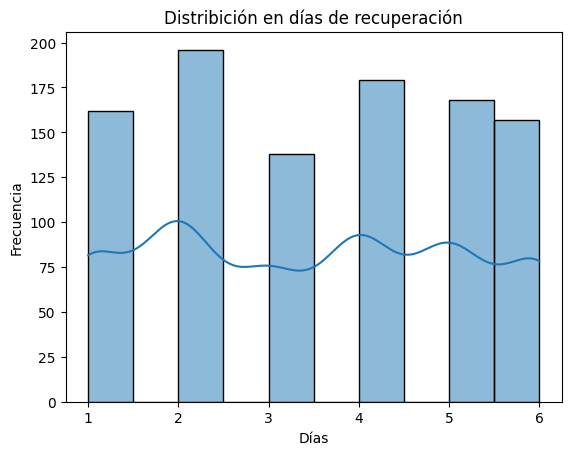

In [6]:
sns.histplot(df_injuries['Recovery_Time'], bins=10, kde=True)
plt.title('Distribición en días de recuperación')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

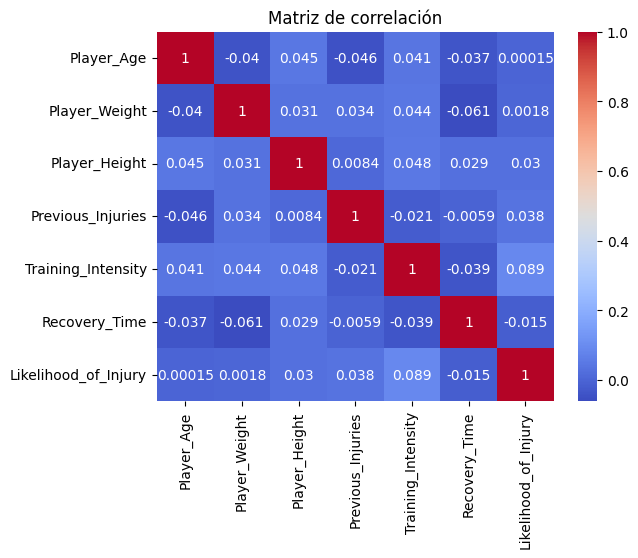

In [7]:
correlation_matrix = df_injuries.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

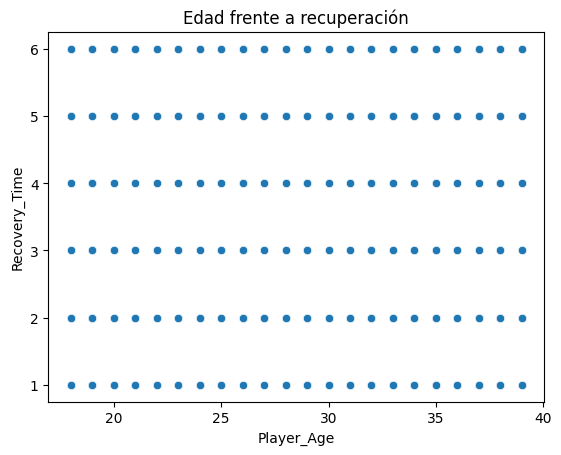

In [8]:
sns.scatterplot(x='Player_Age', y='Recovery_Time', data=df_injuries)
plt.title('Edad frente a recuperación')
plt.show()

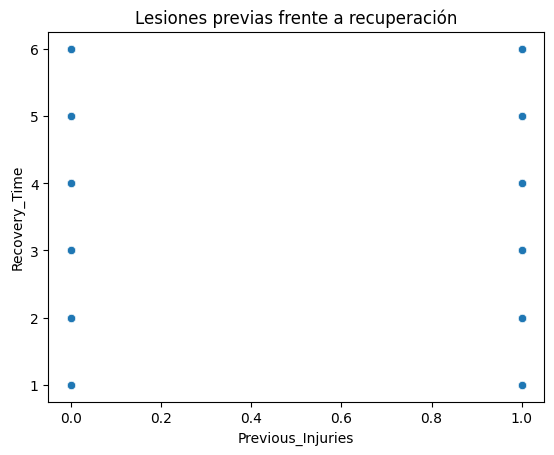

In [9]:
sns.scatterplot(x='Previous_Injuries', y='Recovery_Time', data=df_injuries)
plt.title('Lesiones previas frente a recuperación')
plt.show()

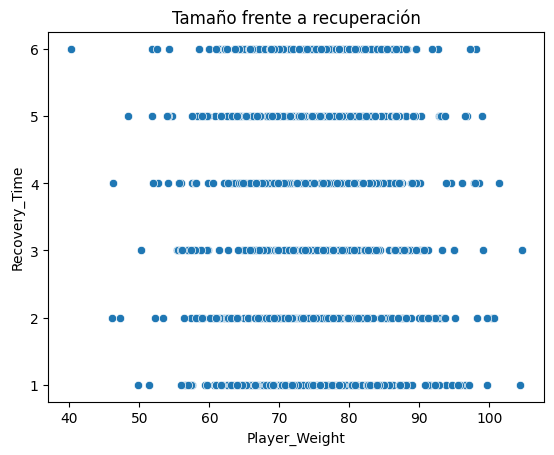

In [10]:
sns.scatterplot(x='Player_Weight', y='Recovery_Time', data=df_injuries)
plt.title('Tamaño frente a recuperación')
plt.show()

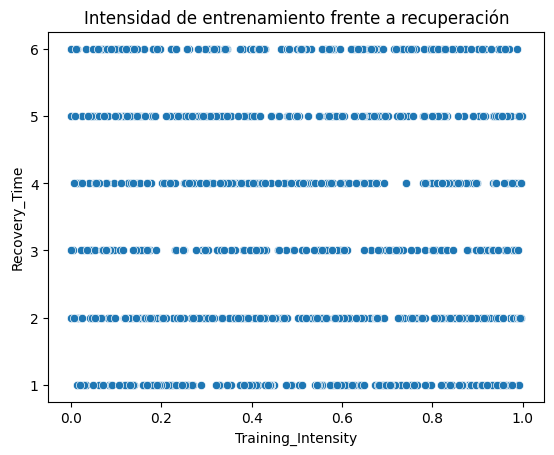

In [11]:
sns.scatterplot(x='Training_Intensity', y='Recovery_Time', data=df_injuries)
plt.title('Intensidad de entrenamiento frente a recuperación')
plt.show()

In [13]:
X = df_injuries.drop(columns=['Recovery_Time'])
y = df_injuries['Recovery_Time']

In [18]:
X.dtypes

Player_Age                int64
Player_Weight           float64
Player_Height           float64
Previous_Injuries         int64
Training_Intensity      float64
Likelihood_of_Injury      int64
dtype: object

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f' MAE: {mae:.2f}')
print(f' R^2: {r2:.2f}')

 MAE: 1.51
 R^2: -0.13


In [17]:
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Player_Age: 0.1586
Player_Weight: 0.2725
Player_Height: 0.2437
Previous_Injuries: 0.0278
Training_Intensity: 0.2650
Likelihood_of_Injury: 0.0323
